In [1]:
import torch
import xarray
from datasets import *
from models import *
from dl_pipeline import *
import dl_pipeline
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import importlib
importlib.reload(dl_pipeline)

<module 'dl_pipeline' from '/home/156/jm0124/kae-cyclones/src/dl_pipeline.py'>

In [2]:
saved_models_path = '/home/156/jm0124/kae-cyclones/saved_models'

In [7]:
model_kae = koopmanAE(4, steps=4, steps_back=4, alpha=1).to(0)
model_dae = koopmanAE(4, steps=4, steps_back=4, alpha=1).to(0)
regular_ae = regularAE(4, steps=4, steps_back=4, alpha=1).to(0)

In [7]:
model_kae.load_state_dict(torch.load(f'{saved_models_path}/kae-model-continued-4.294729958088725.pt'))
model_dae.load_state_dict(torch.load(f'{saved_models_path}/ae-model-continued-0.5967644008346525.pt'))
regular_ae.load_state_dict(torch.load(f'{saved_models_path}/ae-model-continued-0.7446323289952181.pt'))

NameError: name 'model_kae' is not defined

In [3]:
dataset, val_ds, test_ds = generate_example_dataset()
loader = torch.utils.data.DataLoader(dataset, batch_size=128, num_workers=8, pin_memory=True, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=128, num_workers=8, pin_memory=True, shuffle=True)

In [10]:
eval_models(model_kae, val_loader, len(val_ds), koopman=True)

 58%|█████▊    | 97/168.046875 [00:38<00:32,  2.20it/s]

Loss: 4.2726731300354
Fwd loss: 0.6287862875244834


169it [01:01,  2.73it/s]                                

0. 4.29878289698446
Fwd loss: [0.6107052645645603]
Back loss: [2.9718778923243936]
Iden loss: [0.7150331962723778]
Cons loss: [0.0011664868779705602]


([0.6107052645645603],
 [2.9718778923243936],
 [0.7150331962723778],
 [0.0011664868779705602])

In [27]:
eval_models(model_dae, val_loader, len(val_ds), koopman=False)

 61%|██████▏   | 103/168.046875 [00:19<00:09,  6.87it/s]

Loss: 0.6261318762495061
Fwd loss: 0.6261318762495061


169it [00:31,  5.37it/s]                                

0. 0.5741924918124643
Fwd loss: [0.5741924918124643]
Back loss: [0.0]
Iden loss: [0.0]
Cons loss: [0.0]


([0.5741924918124643], [0.0], [0.0], [0.0])

In [28]:
eval_models(regular_ae, val_loader, len(val_ds), koopman=False)

  0%|          | 0/168.046875 [00:00<?, ?it/s]/home/156/jm0124/.local/lib/python3.9/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 1, 20, 20])) that is different to the input size (torch.Size([100, 1, 20, 20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/156/jm0124/.local/lib/python3.9/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 1, 20, 20])) that is different to the input size (torch.Size([10000, 1, 20, 20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  1%|          | 1/168.046875 [00:00<01:41,  1.65it/s]

tensor([[-12.9794,  15.0303, -10.8692, -54.4534]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[ -4.9191,   7.5709,  -9.2511, -55.2427]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


 61%|██████    | 102/168.046875 [00:07<00:04, 13.66it/s]

Loss: 0.722076727585359
Fwd loss: 0.722076727585359


169it [00:12, 13.05it/s]                                

0. 0.7121316902696228
Fwd loss: [0.7121316902696228]
Back loss: [0.0]
Iden loss: [0.0]
Cons loss: [0.0]


([0.7121316902696228], [0.0], [0.0], [0.0])

In [ ]:
model_kae, losses, fwd_loss, back_loss, iden_loss, cons_loss = train(model_kae, loader, len(dataset), koopman=True)

In [ ]:
model_dae, losses2, fwd_loss2, back_loss2, iden_loss2, cons_loss2 = train(model_dae, loader, len(dataset), koopman=False, num_epochs=50)

In [42]:
Fwd_loss_kae = [37.4984584346624, 1.3706834874124285, 1.1066502661236162, 1.0335367590350695, 0.8866939360270696, 0.8977311416831757, 0.8323714763113803, 0.8269236570743801, 0.7481371078137455, 0.7442124836132916, 0.7336843072577586, 0.7326319497565359, 0.7537064488618714, 0.7104019369313965, 0.7158901180707371]
Back_loss_kae = [2.6110084796378725, 2.646261265115607, 2.677155958938313, 2.660595344622434, 2.608285559940179, 2.652814381709649, 2.6516120450537173, 2.6610749046219198, 2.74896161306814, 2.701543203935163, 2.5912907616006073, 2.693747064087116, 2.6763754846682657, 2.5947179233617486, 2.5640619215484954]
Iden_loss_kae = [2.7614497975371908, 1.5887175325578118, 1.1412864384590866, 1.0065355673819079, 0.8998097696298759, 0.8504026837077581, 0.8370186171217674, 0.8630189845005037, 0.8146122816581287, 0.8333652670024374, 0.8090616762864598, 0.805703614775655, 0.829167628496022, 0.7909116430289503, 0.8010703537919835]
Cons_loss_kae = [0.0020571694581600114, 0.0033801063847729617, 0.0027910414264172775, 0.0025881343959203527, 0.0024143100320738378, 0.002278616676112503, 0.0021377601457136177, 0.0018223660630759695, 0.0017969200855192558, 0.0016461797536394666, 0.0015381975081830957, 0.0014982963875398332, 0.0014012439317556205, 0.0013253123112270321, 0.001292650219834803]
Fwd_loss_dae = [9.299542218107677, 0.8278117301094916, 0.7944367235790776, 0.7925899326444861, 0.7320340721671164, 0.7184472279156148, 0.7133098922248439, 0.6861459811718156, 0.6384171716724326]
Fwd_loss_ae = [2.013717119059021, 1.6636730678899136, 1.391225292647376, 1.3697614338013222, 1.2608350455238062, 1.1162528823586526, 1.0217009603925582, 0.9639610768322497, 0.9884725677738179]

In [ ]:
Fwd_loss_2 = [0.6917306352354613, 0.7591869634892859, 0.732633488021392, 0.7044883445764334, 0.8113418562942067, 0.6974268507365665, 0.7451391678638124, 0.7207671794422418, 0.7884981740070328, 1.0019935123777064, 0.8528851430887, 0.8594017948708665, 0.7048990345815376, 0.7246136415675537, 0.7346564533271782, 0.7317864294940053]
Back_loss_2 = [2.7064270032431876, 2.707575610115917, 2.6505700238535623, 2.579208389283935, 2.6832466049410546, 2.7126605594641595, 2.7604917083746887, 2.6605778543171676, 2.644007013670195, 2.7216043871950997, 2.604016331823256, 2.6854220894427536, 2.691911715176625, 2.6770951684894166, 2.5701912977378414, 2.5447857760203685]
Iden_loss_2 = [0.7858975214013428, 0.8149448784064155, 0.8107383495703693, 0.7712713112986671, 0.7989915839721048, 0.7793481766223449, 0.7826510699469525, 0.7606838161657903, 0.7761068127850917, 0.7724818109496069, 0.7717482987132086, 0.7416814867771182, 0.7584096020797219, 0.73921433281516, 0.7536157120246954, 0.7555757044057418]
Cons_loss_2 = [0.0012592059664203968, 0.0013375872956735884, 0.0012680076910713926, 0.001190886871034889, 0.001149924134114723, 0.001198402273890995, 0.0012354403128436774, 0.0012091834284945707, 0.0011504410192794542, 0.0011188390419413807, 0.0010949681401509102, 0.0010468520782851722, 0.0010613666193522245, 0.001060425533822227, 0.0011214723077823795, 0.001099611806701366]

In [43]:
Fwd_loss_kae = Fwd_loss_kae[:9]
Back_loss_kae = Back_loss_kae[:9]
Iden_loss_kae = Iden_loss_kae[:9]
Cons_loss_kae = Cons_loss_kae[:9]

In [ ]:
model_dae, losses, fwd_loss, back_loss, iden_loss, cons_loss = train(model_dae, loader, len(dataset), koopman=False)

In [ ]:
regular_ae, losses, fwd_loss, back_loss, iden_loss, cons_loss = train(regular_ae, loader, len(dataset), koopman=False)

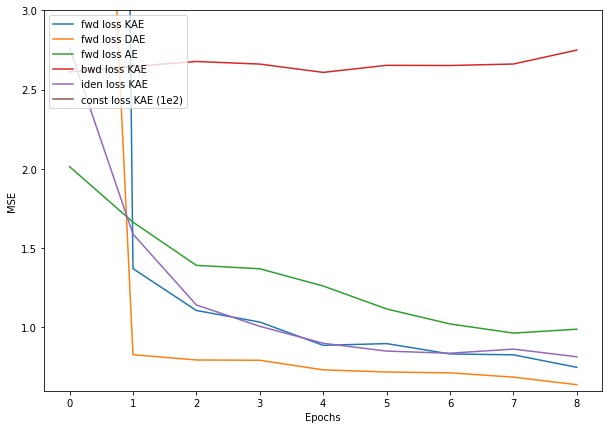

In [47]:
x = list(range(len(Fwd_loss_kae)))

Cons_loss_kae = [x*1e2 for x in Cons_loss_kae]

plt.figure(figsize=(10, 7))
# plt.plot(x, Fwd_loss, label = "fwd loss")
plt.plot(x, Fwd_loss_kae, label = "fwd loss KAE")
plt.plot(x, Fwd_loss_dae, label = "fwd loss DAE")
plt.plot(x, Fwd_loss_ae, label = "fwd loss AE")
plt.plot(x, Back_loss_kae, label = "bwd loss KAE")
plt.plot(x, Iden_loss_kae, label = "iden loss KAE")
plt.plot(x, Cons_loss_kae, label = "const loss KAE (1e2)")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(loc=2)
plt.ylim((0.6,3))
plt.savefig("Third Training Attempt.png")

In [ ]:
model_kae.load_state_dict(torch.load('./saved_models/kae-model-continued-4.082315057579133.pt'))

In [ ]:
eval_models(model_kae, val_loader, len(val_ds), koopman=True)

In [ ]:
model_dae.load_state_dict(torch.load('./saved_models/ae-model-continued-0.6384171716724326.pt'))

In [ ]:
eval_models(model_dae, val_loader, len(val_ds), koopman=False)

In [50]:
regular_ae.load_state_dict(torch.load('./saved_models/ae-model-continued-0.7446323289952181.pt'))

<All keys matched successfully>

In [ ]:
eval_models(regular_ae, val_loader, len(val_ds), koopman=False)

In [ ]:
model_kae, losses1, fwd_loss1, back_loss1, iden_loss1, cons_loss1 = train(model_kae, loader, len(dataset), koopman=True, num_epochs=50)

In [ ]:
model_dae, losses2, fwd_loss2, back_loss2, iden_loss2, cons_loss2 = train(model_dae, loader, len(dataset), koopman=False,  num_epochs=50)

In [ ]:
regular_ae, losses3, fwd_loss3, back_loss3, iden_loss3, cons_loss3 = train(regular_ae, loader, len(dataset), koopman=False, num_epochs=50)

In [17]:
Fwd_loss_kae = [37.4984584346624, 1.3706834874124285, 1.1066502661236162, 1.0335367590350695, 0.8866939360270696, 0.8977311416831757, 0.8323714763113803, 0.8269236570743801, 0.7481371078137455, 0.7442124836132916, 0.7336843072577586, 0.7326319497565359, 0.7537064488618714, 0.7104019369313965, 0.7158901180707371, 0.6917306352354613, 0.7591869634892859, 0.732633488021392, 0.7044883445764334, 0.8113418562942067, 0.6974268507365665, 0.7451391678638124, 0.7207671794422418, 0.7884981740070328, 1.0019935123777064, 0.8528851430887, 0.8594017948708665, 0.7048990345815376, 0.7246136415675537, 0.7346564533271782, 0.7317864294940053]
Back_loss_kae = [2.6110084796378725, 2.646261265115607, 2.677155958938313, 2.660595344622434, 2.608285559940179, 2.652814381709649, 2.6516120450537173, 2.6610749046219198, 2.74896161306814, 2.701543203935163, 2.5912907616006073, 2.693747064087116, 2.6763754846682657, 2.5947179233617486, 2.5640619215484954, 2.7064270032431876, 2.707575610115917, 2.6505700238535623, 2.579208389283935, 2.6832466049410546, 2.7126605594641595, 2.7604917083746887, 2.6605778543171676, 2.644007013670195, 2.7216043871950997, 2.604016331823256, 2.6854220894427536, 2.691911715176625, 2.6770951684894166, 2.5701912977378414, 2.5447857760203685]
Iden_loss_kae = [2.7614497975371908, 1.5887175325578118, 1.1412864384590866, 1.0065355673819079, 0.8998097696298759, 0.8504026837077581, 0.8370186171217674, 0.8630189845005037, 0.8146122816581287, 0.8333652670024374, 0.8090616762864598, 0.805703614775655, 0.829167628496022, 0.7909116430289503, 0.8010703537919835, 0.7858975214013428, 0.8149448784064155, 0.8107383495703693, 0.7712713112986671, 0.7989915839721048, 0.7793481766223449, 0.7826510699469525, 0.7606838161657903, 0.7761068127850917, 0.7724818109496069, 0.7717482987132086, 0.7416814867771182, 0.7584096020797219, 0.73921433281516, 0.7536157120246954, 0.7555757044057418]
Cons_loss_kae = [0.0020571694581600114, 0.0033801063847729617, 0.0027910414264172775, 0.0025881343959203527, 0.0024143100320738378, 0.002278616676112503, 0.0021377601457136177, 0.0018223660630759695, 0.0017969200855192558, 0.0016461797536394666, 0.0015381975081830957, 0.0014982963875398332, 0.0014012439317556205, 0.0013253123112270321, 0.001292650219834803, 0.0012592059664203968, 0.0013375872956735884, 0.0012680076910713926, 0.001190886871034889, 0.001149924134114723, 0.001198402273890995, 0.0012354403128436774, 0.0012091834284945707, 0.0011504410192794542, 0.0011188390419413807, 0.0010949681401509102, 0.0010468520782851722, 0.0010613666193522245, 0.001060425533822227, 0.0011214723077823795, 0.001099611806701366]
Fwd_loss_dae = [9.299542218107677, 0.8278117301094916, 0.7944367235790776, 0.7925899326444861, 0.7320340721671164, 0.7184472279156148, 0.7133098922248439, 0.6861459811718156, 0.6384171716724326, 0.6528034065578717, 0.6016376434184489, 0.6076728013208079, 0.6398671471919701, 0.5957014404006858, 0.5961156004046095, 0.6047847242071207, 0.5808910026657949, 0.5775044397042994, 0.5866713029162804, 0.5886771660312485, 0.5836011747802571, 0.6175539577912121, 0.5720894299743179, 0.5896158148037167, 0.5791598878392061, 0.5967644008346525, 0.5967644008346525, 0.5967644008346525, 0.5967644008346525, 0.5967644008346525, 0.5967644008346525]
Fwd_loss_ae = [2.013717119059021, 1.6636730678899136, 1.391225292647376, 1.3697614338013222, 1.2608350455238062, 1.1162528823586526, 1.0217009603925582, 0.9639610768322497, 0.9884725677738179, 0.9392474585605843, 0.9216995558851729, 0.8891628268819528, 0.8956704302793393, 0.834982509718557, 0.824825263277765, 0.8145365912104152, 0.8044691544697905, 0.7758163413918532, 0.7986591007897857, 0.7805363752030449, 0.7641316189405123, 0.7550642994570528, 0.7760134643913927, 0.761501333247471, 0.7454660756718154, 0.7449509399248827, 0.7453161407590629, 0.7656352314553841, 0.7452948952140349, 0.7628810127701912, 0.7509773196476562, 0.7573132233707595, 0.7348848989353991, 0.7155925695488973, 0.7269061884327266]

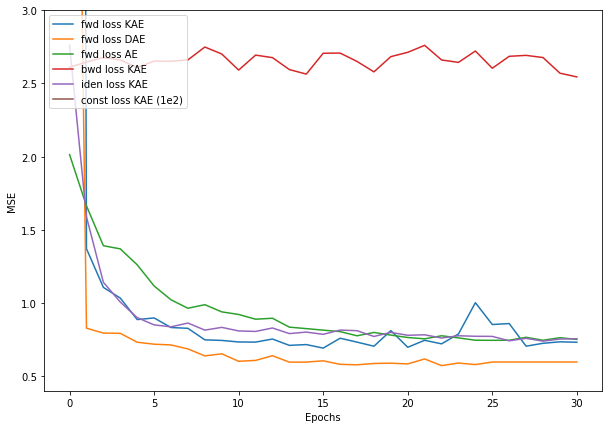

In [18]:
x = list(range(len(Fwd_loss_dae)))
Fwd_loss_kae = Fwd_loss_kae[:len(Fwd_loss_dae)]
Fwd_loss_ae = Fwd_loss_ae[:len(Fwd_loss_dae)]
Back_loss_kae = Back_loss_kae[:len(Fwd_loss_dae)]
Iden_loss_kae = Iden_loss_kae[:len(Fwd_loss_dae)]
Cons_loss_kae = Cons_loss_kae[:len(Fwd_loss_dae)]

Cons_loss_kae = [x*1e2 for x in Cons_loss_kae]

plt.figure(figsize=(10, 7))
# plt.plot(x, Fwd_loss, label = "fwd loss")
plt.plot(x, Fwd_loss_kae, label = "fwd loss KAE")
plt.plot(x, Fwd_loss_dae, label = "fwd loss DAE")
plt.plot(x, Fwd_loss_ae, label = "fwd loss AE")
plt.plot(x, Back_loss_kae, label = "bwd loss KAE")
plt.plot(x, Iden_loss_kae, label = "iden loss KAE")
plt.plot(x, Cons_loss_kae, label = "const loss KAE (1e2)")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(loc=2)
plt.ylim((0.4,3))
plt.savefig("Fourth Training Attempt.png")

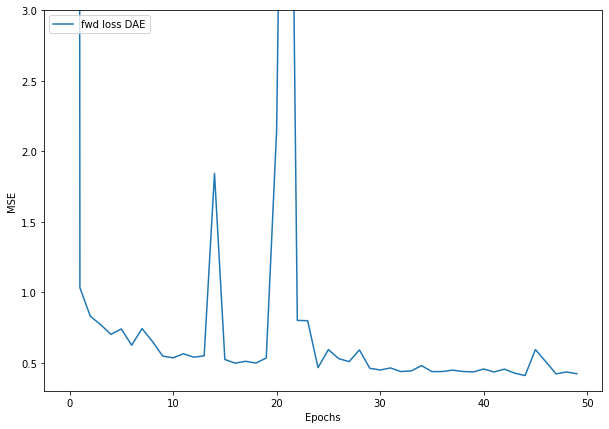

In [37]:
x = list(range(len(dae_loss)))
dae_loss = [94.32086895915049, 1.0313335547617537, 0.8293780644251489, 0.7693035931392277, 0.7007715645377848, 0.7388162028060419, 0.6233424934341673, 0.7416701316468278, 0.6501623900214761, 0.5461095704450304, 0.5340540410169742, 0.5625616435646276, 0.5386519829509427, 0.5479003381055159, 1.8426052081335669, 0.5220321648620849, 0.4959156108959833, 0.5094872890002033, 0.49687753290428033, 0.5327081669790809, 2.145551781790584, 7.656936722787959, 0.7996550515997207, 0.7970390699594838, 0.4643897848939888, 0.5923314481871281, 0.5281727510833861, 0.5069185979999914, 0.5899421113939723, 0.459846417655594, 0.4476710869307109, 0.4621832015330627, 0.4364369823560252, 0.4409120188304923, 0.47882657972812587, 0.43603760893665666, 0.436568953764487, 0.4465931466668727, 0.4368521837427928, 0.4337093750729897, 0.45466524506860345, 0.4335318518783681, 0.4536554595616704, 0.425087839490198, 0.4083291968778122, 0.5925886679459547, 0.5064822306913568, 0.4198667565621245, 0.43369008443360774, 0.4210312087978713]
plt.figure(figsize=(10, 7))
# plt.plot(x, Fwd_loss, label = "fwd loss")
plt.plot(x, dae_loss, label = "fwd loss DAE")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(loc=2)
plt.ylim((0.3,3))
plt.savefig("Fifth Training Attempt.png")

In [4]:
model_dae = koopmanAE(16, steps=4, steps_back=4, alpha=16).to(0)
model_dae.load_state_dict(torch.load(f'{saved_models_path}/ELEI-init_and_loss_eigen_with_4.5_to_4.5_uniform_distribution-temp-49.pt'))

<All keys matched successfully>

In [5]:
eval_models(model_dae, val_loader, len(val_ds), koopman=False)

 58%|█████▊    | 98/168.046875 [00:33<00:21,  3.29it/s]

Loss: 0.3320772172224642
Fwd loss: 0.3320772172224642


169it [00:53,  3.17it/s]                                

0. 0.37283447262078095
Fwd loss: [0.37283447262078095]
Back loss: [0.0]
Iden loss: [0.0]
Cons loss: [0.0]


([0.37283447262078095], [0.0], [0.0], [0.0])

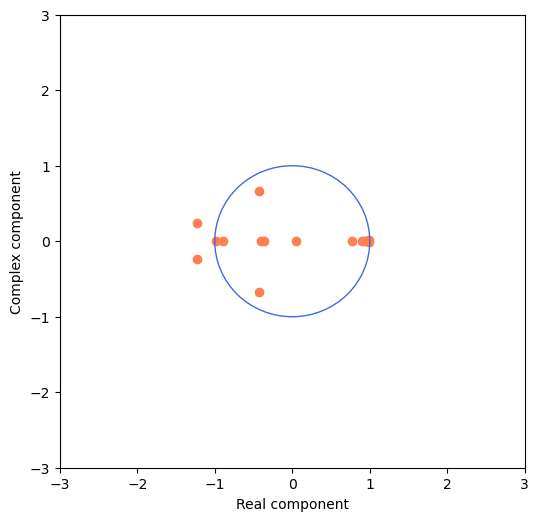

In [6]:
def graph_eigenspectrum(model):
    w, v = np.linalg.eig(model.dynamics.dynamics.weight.cpu().detach().numpy())
    fig, ax = plt.subplots(figsize=(6,6), dpi=100)
    plt.scatter(w.real, w.imag, color='coral')
    circle = plt.Circle((0, 0), 1, color='royalblue', fill=False)
    ax.add_patch(circle)
    plt.xlabel("Real component")
    plt.ylabel("Complex component")
    plt.ylim(-3,3)
    plt.xlim(-3,3)
    # plt.savefig("Maximal eigen-loss without eigen-initialisation.png")
    plt.show()

graph_eigenspectrum(model_dae)

 62%|██████▏   | 105/168.046875 [00:03<00:01, 36.80it/s]

Loss: 0.5174802741920105
Fwd loss: 0.5174802741920105


169it [00:04, 36.02it/s]                                


0. 0.49850793968849766
Fwd loss: [0.49850793968849766]
Back loss: [0.0]
Iden loss: [0.0]
Cons loss: [0.0]


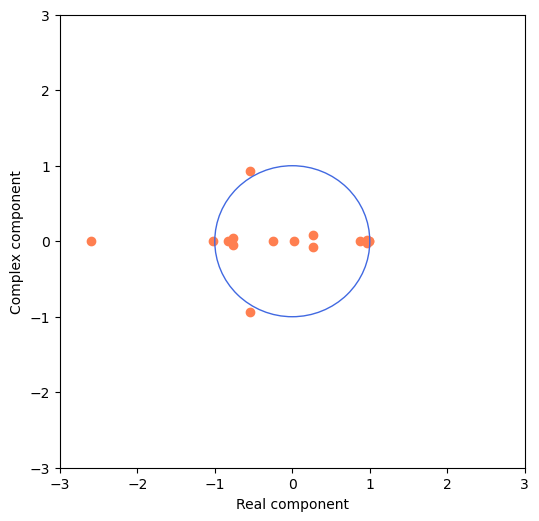

 62%|██████▏   | 105/168.046875 [00:03<00:01, 37.61it/s]

Loss: 0.4053772102401714
Fwd loss: 0.4053772102401714


169it [00:04, 36.52it/s]                                


0. 0.40107086550518833
Fwd loss: [0.40107086550518833]
Back loss: [0.0]
Iden loss: [0.0]
Cons loss: [0.0]


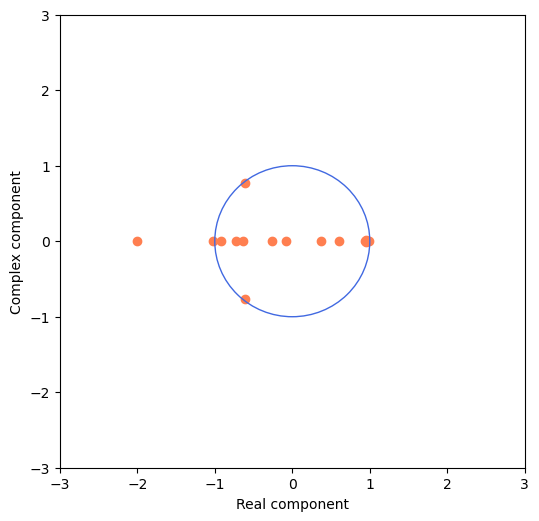

 64%|██████▎   | 107/168.046875 [00:03<00:01, 34.19it/s]

Loss: 0.41464684911147515
Fwd loss: 0.41464684911147515


169it [00:04, 35.65it/s]                                


0. 0.4112855191676354
Fwd loss: [0.4112855191676354]
Back loss: [0.0]
Iden loss: [0.0]
Cons loss: [0.0]


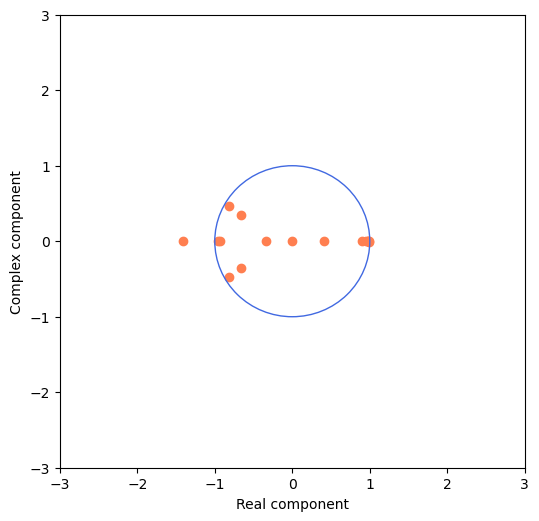

 62%|██████▏   | 105/168.046875 [00:03<00:01, 38.32it/s]

Loss: 0.4012696241790598
Fwd loss: 0.4012696241790598


169it [00:04, 35.80it/s]                                


0. 0.4118270099911231
Fwd loss: [0.4118270099911231]
Back loss: [0.0]
Iden loss: [0.0]
Cons loss: [0.0]


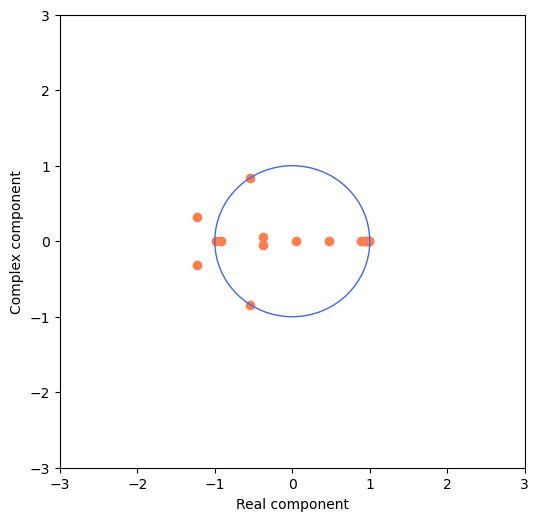

 62%|██████▏   | 105/168.046875 [00:02<00:01, 36.58it/s]

Loss: 0.40956513523453414
Fwd loss: 0.40956513523453414


169it [00:04, 35.51it/s]                                


0. 0.4247360111557567
Fwd loss: [0.4247360111557567]
Back loss: [0.0]
Iden loss: [0.0]
Cons loss: [0.0]


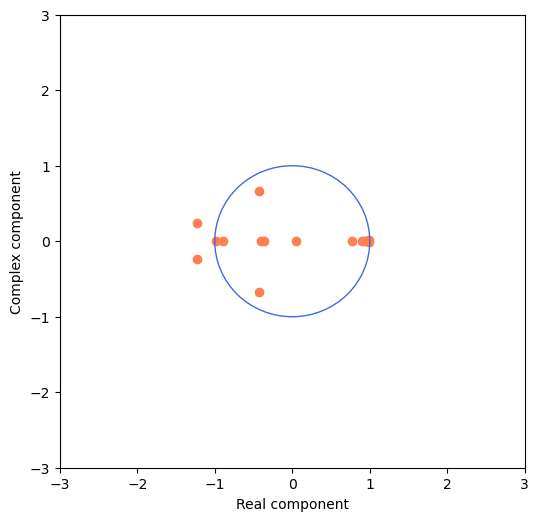

FileNotFoundError: [Errno 2] No such file or directory: '/home/156/jm0124/kae-cyclones/saved_models/ELEI-init_and_loss_eigen_with_4.5_to_4.5_uniform_distribution-temp-59.pt'

In [10]:
for i in range(0,6):
    model_dae = koopmanAE(16, steps=4, steps_back=4, alpha=16).to(0)
    model_dae.load_state_dict(torch.load(f'{saved_models_path}/ELEI-init_and_loss_eigen_with_4.5_to_4.5_uniform_distribution-temp-{i*10+9}.pt'))
    
    eval_models(model_dae, val_loader, len(val_ds), koopman=False)
    
    graph_eigenspectrum(model_dae)